# ***QUESTION 1 (Principal Component Analysis)***


---



---

Using the Annealing Dataset.

### ***1. From the given link, download “anneal.data”, “anneal.names” and “anneal.test”, convert them into a readable format (Ex: txt, csv, etc....) and do meaningful Exploratory Data Analysis.***

In [332]:
import pandas as pd
import numpy as np

columns = ['family', 'product_type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non_ageing', 'surface_finish', 
           'surface_quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 
           'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 
           'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'classes']

anneal_data = pd.read_csv('/content/drive/MyDrive/PRML/Lab 7/anneal.data', names=columns)
# anneal_names = pd.read_csv('/content/drive/MyDrive/PRML/Lab 7/anneal.names')
anneal_test = pd.read_csv('/content/drive/MyDrive/PRML/Lab 7/anneal.test', names=columns, header=None)

In [333]:
anneal_data

,family,product_type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non_ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [334]:
for i in columns:
    for j in range(len(anneal_data['family'])):
        if '?' in str(anneal_data[i][j]):
            anneal_data[i][j] = None

<ipython-input-334-88c880f66c15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anneal_data[i][j] = None


In [335]:
print('The number of null values in each column is as follows: ')
anneal_data.isna().sum()

The number of null values in each column is as follows: 


family                    687
product_type                0
steel                      70
carbon                      0
hardness                    0
temper_rolling            675
condition                 271
formability               283
strength                    0
non_ageing                703
surface_finish            790
surface_quality           217
enamelability             785
bc                        797
bf                        680
bt                        736
bw/me                     609
bl                        662
m                         798
chrom                     775
phos                      791
cbond                     730
marvi                     798
exptl                     796
ferro                     772
corr                      798
blue/bright/varn/clean    793
lustre                    753
jurofm                    798
s                         798
p                         798
shape                       0
thick                       0
width     

### ***2. Preprocess the data (If any discrepancies/errors, handle them as well) and split the data into [65:35]. There are two subparts here. You need to write in the report about the difference in the observations and explain it if any:***

***● Perform feature standardization and use the standardized data for the rest of the questions.***

***● Do not perform feature standardization and use the original data for the rest of the questions.***

In [336]:
for i in anneal_data.columns:
    if anneal_data[i].isnull().sum()>200:
        anneal_data = anneal_data.drop(i, axis=1)

anneal_data

,product_type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,C,None,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [337]:
print('The number of null values in each column is as follows: ')
anneal_data.isna().sum()

The number of null values in each column is as follows: 


product_type     0
steel           70
carbon           0
hardness         0
strength         0
shape            0
thick            0
width            0
len              0
bore             0
classes          0
dtype: int64

In [338]:
anneal_data['steel'] = anneal_data['steel'].fillna(anneal_data['steel'].mode()[0])

print('The mode of column \'steel\' is:', anneal_data['steel'].mode()[0])

The mode of column 'steel' is: A


In [339]:
print('The number of null values in each column is as follows: ')
anneal_data.isna().sum()

The number of null values in each column is as follows: 


product_type    0
steel           0
carbon          0
hardness        0
strength        0
shape           0
thick           0
width           0
len             0
bore            0
classes         0
dtype: int64

In [340]:
anneal_data = pd.get_dummies(anneal_data, columns = ['product_type','steel', 'shape', 'bore'])
print(anneal_data)

     carbon  hardness  strength  thick   width   len classes  product_type_C  \
0         8         0         0  0.700   610.0     0       3               1   
1         0         0         0  3.200   610.0     0       3               1   
2         0         0         0  0.700  1300.0   762       3               1   
3         0        60         0  2.801   385.1     0       3               1   
4         0        60         0  0.801   255.0   269       3               1   
..      ...       ...       ...    ...     ...   ...     ...             ...   
793       0        50         0  1.001    50.0     0       3               1   
794       0         0         0  0.699  1300.0  4880       3               1   
795       0         0         0  0.400   609.9     0       3               1   
796       0         0         0  3.200   610.0  4880       3               1   
797       0         0         0  1.599  1500.0  4170       2               1   

     steel_A  steel_K  steel_M  steel_R

In [341]:
anneal_data_y = anneal_data['classes']
anneal_data_x = anneal_data.drop('classes', axis=1)

In [342]:
anneal_data_x_copy = anneal_data_x.copy()
anneal_data_y_copy = anneal_data_y.copy()

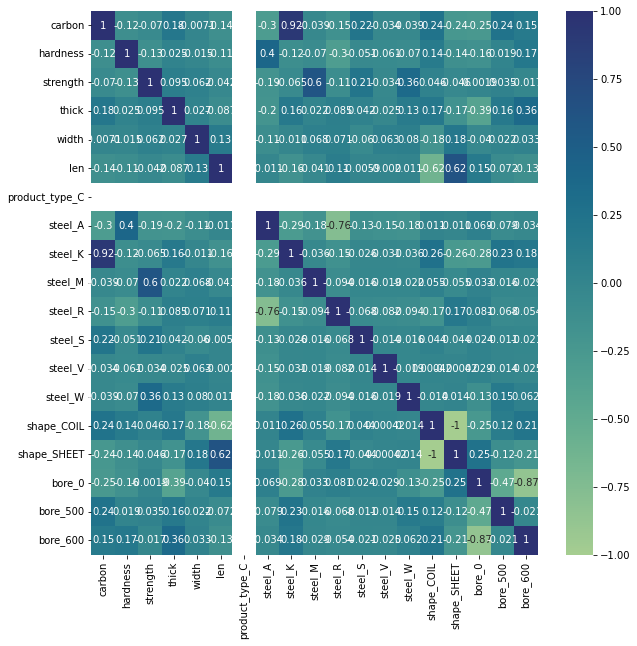

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
dataplot = sns.heatmap(anneal_data.corr(), cmap='crest', annot=True)
plt.show()

In [344]:
anneal_data_standard_x = anneal_data_x.copy()

In [345]:
cont_cols = ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']

for i in cont_cols:
    anneal_data_standard_x[i] = (anneal_data_standard_x[i]-anneal_data_standard_x[i].mean())/anneal_data_standard_x[i].std()

In [346]:
from sklearn.model_selection import train_test_split as split

anneal_data_std_x, anneal_data_std_x_test, anneal_data_std_y, anneal_data_std_y_test = split(anneal_data_standard_x, anneal_data_y, train_size=0.65, random_state=True)
anneal_data_x, anneal_data_x_test, anneal_data_y, anneal_data_y_test = split(anneal_data_x, anneal_data_y, train_size=0.65, random_state=True)

### ***3. Train 2-3 Classification Models (studied and implemented so far out of which one has to be SVM classifier) with the proper reasoning of choosing them and showing 5-Fold Cross-Validation. Plots as well for comparison.***

In [347]:
from sklearn.ensemble import RandomForestClassifier as rand_clf
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

model1 = SVC()
model2 = rand_clf()
model3 = DTC()

With ORIGINAL DATA

In [348]:
from sklearn.model_selection import cross_val_score

In [376]:
scores1 = cross_val_score(model1, anneal_data_x, anneal_data_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores1)

model1.fit(anneal_data_x, anneal_data_y)
print('SVM Classifier Accuracy (Test Set): ', model1.score(anneal_data_x_test, anneal_data_y_test)*100)

5 Fold Cross Validation Scores:  [0.76923077 0.76923077 0.75961538 0.76699029 0.76699029]
SVM Classifier Accuracy (Test Set):  75.35714285714286


In [377]:
scores2 = cross_val_score(model2, anneal_data_x, anneal_data_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores2)

model2.fit(anneal_data_x, anneal_data_y)
print('Random Forest Classifier Accuracy (Test Set): ', model2.score(anneal_data_x_test, anneal_data_y_test)*100)

5 Fold Cross Validation Scores:  [0.94230769 0.85576923 0.875      0.91262136 0.85436893]
Random Forest Classifier Accuracy (Test Set):  88.57142857142857


In [378]:
scores3 = cross_val_score(model3, anneal_data_x, anneal_data_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores3)

model3.fit(anneal_data_x, anneal_data_y)
print('Decision Tree Accuracy (Test Set): ', model3.score(anneal_data_x_test, anneal_data_y_test)*100)

5 Fold Cross Validation Scores:  [0.93269231 0.88461538 0.85576923 0.88349515 0.86407767]
Decision Tree Accuracy (Test Set):  87.14285714285714


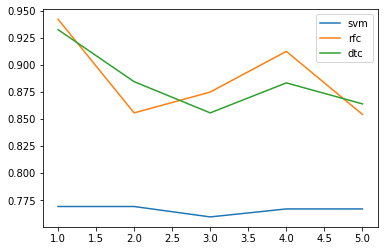

In [379]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1, 6)], scores1)
plt.plot([i for i in range(1, 6)], scores2)
plt.plot([i for i in range(1, 6)], scores3)
plt.legend(['svm', 'rfc', 'dtc'])
plt.show()

with STANDARDIZED DATA

In [352]:
model1_std = SVC()
model2_std = rand_clf()
model3_std = DTC()

In [380]:
scores1_std = cross_val_score(model1_std, anneal_data_std_x, anneal_data_std_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores1_std)

model1_std.fit(anneal_data_std_x, anneal_data_std_y)
print('SVM Classifier Accuracy (Test Set): ', model1_std.score(anneal_data_std_x_test, anneal_data_std_y_test)*100)

5 Fold Cross Validation Scores:  [0.78846154 0.79807692 0.81730769 0.82524272 0.77669903]
SVM Classifier Accuracy (Test Set):  80.71428571428572


In [381]:
scores2_std = cross_val_score(model2_std, anneal_data_std_x, anneal_data_std_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores2_std)

model2_std.fit(anneal_data_std_x, anneal_data_std_y)
print('SVM Classifier Accuracy (Test Set): ', model2_std.score(anneal_data_std_x_test, anneal_data_std_y_test)*100)

5 Fold Cross Validation Scores:  [0.95192308 0.875      0.875      0.90291262 0.87378641]
SVM Classifier Accuracy (Test Set):  88.57142857142857


In [382]:
scores3_std = cross_val_score(model3_std, anneal_data_std_x, anneal_data_std_y, cv=5)
print('5 Fold Cross Validation Scores: ', scores3_std)

model3_std.fit(anneal_data_std_x, anneal_data_std_y)
print('SVM Classifier Accuracy (Test Set): ', model3_std.score(anneal_data_std_x_test, anneal_data_std_y_test)*100)

5 Fold Cross Validation Scores:  [0.93269231 0.88461538 0.875      0.87378641 0.86407767]
SVM Classifier Accuracy (Test Set):  86.78571428571429


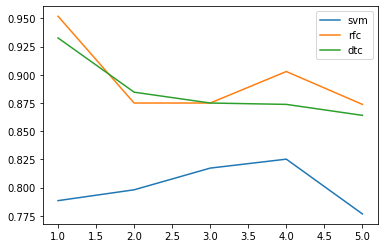

In [383]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1, 6)], scores1_std)
plt.plot([i for i in range(1, 6)], scores2_std)
plt.plot([i for i in range(1, 6)], scores3_std)
plt.legend(['svm', 'rfc', 'dtc'])
plt.show()

### ***4. Implement Principal Component Analysis from scratch, with sub-tasks as following:-***

***a. Centralize the Data via feature-wise means and standard deviations. Write the code for deriving the covariance matrix from scratch.***

***b. Compute Eigenvectors, Eigenvalues and Principal Components and comment on what is the role of eigenvectors in the report. You may use sklearn to find the eigenvectors but others are to be found from scratch.***

In [356]:
anneal_data_cont_x = anneal_data_x_copy[['carbon', 'hardness', 'strength', 'thick', 'width', 'len']]

In [357]:
from scipy.stats import ortho_group
import numpy as np

class PCA():
    def __init__(self, n_components):
        self.n_pcs = n_components

    def centralize(self):
        for i in self.X.columns:
            self.X[i] = (self.X[i]-self.X[i].mean())/self.X[i].std()

    def calc_covar(self):
        n_data = len(self.X)
        n = len(self.X.columns)
        self.covar_mat = np.zeros((n,n))

        m = 0
        for i in self.X.columns:
            n = 0
            for j in self.X.columns:
                cov = 0
                x = self.X[i].mean()
                y = self.X[j].mean()
                for k in range(n_data):
                    cov += (self.X[i][k]-x)*(self.X[j][k]-y)

                cov = cov/n_data
                self.covar_mat[m, n]=cov
                
                n+=1
            m+=1

    def eigen(self):
        m = ortho_group.rvs(dim=len(self.covar_mat))

        eig_mat = self.covar_mat
        eig_mat = np.dot(m, self.covar_mat)
        eig_mat = np.dot(eig_mat, np.transpose(m))

        self.eig_val = []
        for i in range(len(self.covar_mat)):
            self.eig_val.append(eig_mat[i][i])
        
        self.eig_vec = np.linalg.eig(self.covar_mat)[1]

    def prin_comp(self):
        features = []
        for i in range(self.n_pcs):
            pc = []
            eig_vec = self.eig_vec[self.indices[i]]
            for j in range(len(self.X)):
                pc.append(np.dot(eig_vec, self.X.iloc[j]))

            features.append(pc)

        self.prin_comp = features
        
    def fit(self, X):
        self.X = X
        self.centralize()
        self.calc_covar()
        self.eigen()

        # print(self.eig_val, self.eig_vec)
        
        self.eig_vec = np.transpose(self.eig_vec)

        indices = np.argsort(self.eig_val)
        self.indices = np.flip(indices)

        self.prin_comp()

        return self.prin_comp

### ***5. Use the above-made PCA to reduce the data upto a chosen dimension/principal-components. Plot a bar graph to show the change in variance as you increase the no. of components. Along with this, plot a scatter plot to show the direction of the eigenvectors along with the data points(you may choose any 2 features among the reduced dataset).***

In [358]:
var_arr = []
for i in range(1, 7):
    pca = PCA(n_components=i)
    anneal_pc_x = pca.fit(anneal_data_cont_x)

    var_arr.append(np.var(anneal_pc_x))
    print(np.var(anneal_pc_x))

<ipython-input-357-96641b2df8f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[i] = (self.X[i]-self.X[i].mean())/self.X[i].std()


0.8295708585398935
0.9184628432114949
1.0202063819922154
1.0388888791461324
0.9592122165805118
0.9987468671679198


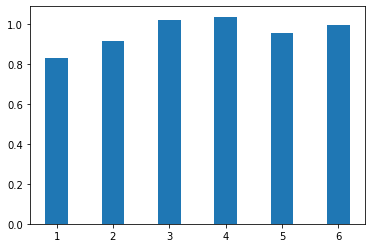

In [359]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(1, 7)], var_arr, width = 0.4)
# plt.ylim(0.9, 1.1)
plt.show()

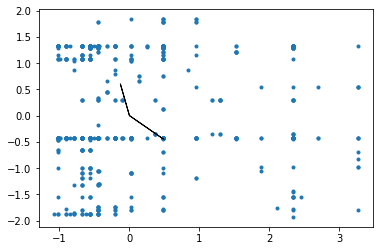

In [360]:
plt.scatter(pca.X['thick'], pca.X['width'], marker='.')

eig_vec1 = pca.eig_vec[3]
eig_vec2 = pca.eig_vec[4]
origin = [np.mean(pca.X['carbon']), np.mean(pca.X['hardness'])]   # taking origin as mean of sample

plt.arrow(origin[0], origin[1], eig_vec1[0], eig_vec1[1], length_includes_head=True)
plt.arrow(origin[0], origin[1], eig_vec2[0], eig_vec2[1], length_includes_head=True)

plt.show()

### ***6. Train 2-3 chosen classification models alongside 5-Fold Cross-Validation Plots.***

In [361]:
pca = PCA(n_components=1)
anneal_pc_x = pca.fit(anneal_data_cont_x)

<ipython-input-357-96641b2df8f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[i] = (self.X[i]-self.X[i].mean())/self.X[i].std()


In [362]:
from sklearn.ensemble import RandomForestClassifier as rand_clf
from sklearn.svm import SVC

model1_pc = SVC()
model2_pc = rand_clf()
model3_pc = DTC()

In [363]:
anneal_pc_x = np.transpose(anneal_pc_x)

In [364]:
from sklearn.model_selection import train_test_split as split

anneal_data_pc_x, anneal_data_pc_x_test, anneal_data_pc_y, anneal_data_pc_y_test = split(anneal_pc_x, anneal_data_y_copy, train_size=0.65, random_state=True)

In [365]:
scores = cross_val_score(model1_pc, anneal_pc_x, anneal_data_y_copy, cv=5)
print('SVC 5 Fold Cross Validation Scores: ', scores)

# model1.fit(anneal_pc_x, anneal_data_y)
# print('SVM Classifier Accuracy (Test Set): ', model1.score(anneal_data_x_test, anneal_data_y_test)*100)

SVC 5 Fold Cross Validation Scores:  [0.75625    0.78125    0.76875    0.7672956  0.76100629]


In [366]:
scores = cross_val_score(model2_pc, anneal_pc_x, anneal_data_y_copy, cv=5)
print('Random Forest 5 Fold Cross Validation Scores: ', scores)

Random Forest 5 Fold Cross Validation Scores:  [0.8        0.83125    0.825      0.79874214 0.79874214]


In [367]:
scores = cross_val_score(model3_pc, anneal_pc_x, anneal_data_y_copy, cv=5)
print('Decision Tree 5 Fold Cross Validation Scores: ', scores)

Decision Tree 5 Fold Cross Validation Scores:  [0.79375    0.8375     0.81875    0.79245283 0.80503145]


### ***7. Show the Test results of Classification Models on both types of datasets (Before and After PCA), via 2-3 Evaluation Metrics of choice (Ex:- Accuracy, Sensitivity, F1-Score, etc.) with the proper reasonings.***

In [368]:
from sklearn.metrics import accuracy_score, f1_score

In [369]:
svc_pred = model1.predict(anneal_data_x_test)
model1_pc.fit(anneal_data_pc_x, anneal_data_y)
svc_pred_pc = model1_pc.predict(anneal_data_pc_x_test)

rfc_pred = model2.predict(anneal_data_x_test)
model2_pc.fit(anneal_data_pc_x, anneal_data_y)
rfc_pred_pc = model2_pc.predict(anneal_data_pc_x_test)

dtc_pred = model3.predict(anneal_data_x_test)
model3_pc.fit(anneal_data_pc_x, anneal_data_y)
dtc_pred_pc = model3_pc.predict(anneal_data_pc_x_test)

In [370]:
print('f1_score')
print('SVM Classifier: ')
print('Original Data: ', accuracy_score(anneal_data_y_test, svc_pred)*100, 'PCA Data: ', accuracy_score(anneal_data_pc_y_test, svc_pred_pc)*100)
print('Random Forest Classifier: ')
print('Original Data: ', accuracy_score(anneal_data_y_test, rfc_pred)*100, 'PCA Data: ', accuracy_score(anneal_data_pc_y_test, rfc_pred_pc)*100)
print('Decision Tree Classifier: ')
print('Original Data: ', accuracy_score(anneal_data_y_test, dtc_pred)*100, 'PCA Data: ', accuracy_score(anneal_data_pc_y_test, dtc_pred_pc)*100)

f1_score
SVM Classifier: 
Original Data:  75.35714285714286 PCA Data:  76.07142857142857
Random Forest Classifier: 
Original Data:  87.85714285714286 PCA Data:  76.42857142857142
Decision Tree Classifier: 
Original Data:  86.07142857142858 PCA Data:  74.64285714285714


In [371]:
print('f1_score')
print('SVM Classifier: ')
print('Original Data: ', f1_score(anneal_data_y_test, svc_pred, average='weighted')*100, 'PCA Data: ', f1_score(anneal_data_pc_y_test, svc_pred_pc, average='weighted')*100)
print('Random Forest Classifier: ')
print('Original Data: ', f1_score(anneal_data_y_test, rfc_pred, average='weighted')*100, 'PCA Data: ', f1_score(anneal_data_pc_y_test, rfc_pred_pc, average='weighted')*100)
print('Decision Tree Classifier: ')
print('Original Data: ', f1_score(anneal_data_y_test, dtc_pred, average='weighted')*100, 'PCA Data: ', f1_score(anneal_data_pc_y_test, dtc_pred_pc, average='weighted')*100)

f1_score
SVM Classifier: 
Original Data:  64.76723887110852 PCA Data:  68.04722304722304
Random Forest Classifier: 
Original Data:  87.62776148094356 PCA Data:  75.91995620149758
Decision Tree Classifier: 
Original Data:  86.61474469305796 PCA Data:  74.06485923725099


### ***8. Were any changes observed before and after implementing PCA, with respect to the distribution of the dataset? Also, make any suitable graph through which the optimal number of principal components can be decided for optimal results.***

In [372]:
svm_acc = []
rfc_acc = []
dtc_acc = []
svm_f1 = []
rfc_f1 = []
dtc_f1 = []
for i in range(1, 7):
    pca = PCA(n_components=i)
    anneal_pc_x = pca.fit(anneal_data_cont_x)
    anneal_pc_x = np.transpose(anneal_pc_x)

    anneal_data_pc_x, anneal_data_pc_x_test, anneal_data_pc_y, anneal_data_pc_y_test = split(anneal_pc_x, anneal_data_y_copy, train_size=0.65, random_state=True)

    model1_pc = SVC()
    model2_pc = rand_clf()
    model3_pc = DTC()

    model1_pc.fit(anneal_data_pc_x, anneal_data_y)
    svc_pred_pc = model1_pc.predict(anneal_data_pc_x_test)

    model2_pc.fit(anneal_data_pc_x, anneal_data_y)
    rfc_pred_pc = model2_pc.predict(anneal_data_pc_x_test)

    model3_pc.fit(anneal_data_pc_x, anneal_data_y)
    dtc_pred_pc = model3_pc.predict(anneal_data_pc_x_test)


    svm_acc.append(accuracy_score(anneal_data_y_test, svc_pred_pc)*100)
    rfc_acc.append(accuracy_score(anneal_data_y_test, rfc_pred_pc)*100)
    dtc_acc.append(accuracy_score(anneal_data_y_test, dtc_pred_pc)*100)
    svm_f1.append(f1_score(anneal_data_y_test, svc_pred_pc, average='weighted')*100)
    rfc_f1.append(f1_score(anneal_data_y_test, rfc_pred_pc, average='weighted')*100)
    dtc_f1.append(f1_score(anneal_data_y_test, dtc_pred_pc, average='weighted')*100)

<ipython-input-357-96641b2df8f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[i] = (self.X[i]-self.X[i].mean())/self.X[i].std()
<ipython-input-357-96641b2df8f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[i] = (self.X[i]-self.X[i].mean())/self.X[i].std()
<ipython-input-357-96641b2df8f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

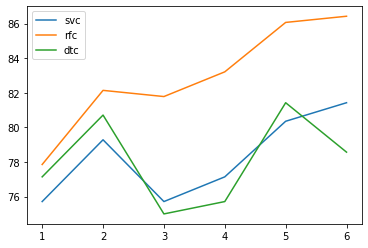

In [373]:
x_axis = [i for i in range(1, 7)]

plt.plot(x_axis, svm_acc)
plt.plot(x_axis, rfc_acc)
plt.plot(x_axis, dtc_acc)
plt.legend(['svc', 'rfc', 'dtc'])
plt.show()

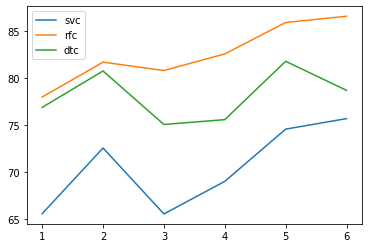

In [374]:
x_axis = [i for i in range(1, 7)]

plt.plot(x_axis, svm_f1)
plt.plot(x_axis, rfc_f1)
plt.plot(x_axis, dtc_f1)
plt.legend(['svc', 'rfc', 'dtc'])
plt.show()

# ***QUESTION 2 (Linear Discriminant Analysis)***


---



---

